In [1]:
import sys

sys.path.append('/Users/huberyhu/Desktop/SURP/im_deinfluence/model_code')

import networkx as nx
import experiment_framework as ef
import matplotlib.pyplot as plt
import copy

In [2]:
# Load the graph from the file
save_path = '/Users/huberyhu/Desktop/SURP/im_deinfluence/network_data/email_eu_core_graph.gpickle'
try:
    with open(save_path, 'rb') as f:
        G = pickle.load(f)
    print(f"Graph loaded from {save_path}")
except Exception as e:
    print(f"An error occurred while loading the graph: {e}")

Graph loaded from /Users/huberyhu/Desktop/SURP/im_deinfluence/network_data/email_eu_core_graph.gpickle


In [3]:
model = ef.run_influence_cascade(G, num_influencers=50, steps=3, selection_method='random')

# Evaluate the influence and deinfluence
num_influenced = model.evaluate_influence()
num_deinfluenced = model.evaluate_deinfluence()
num_susceptible = model.evaluate_susceptible()

# Create a deep copy of the model
model_fixed_influencers = copy.deepcopy(model)

# Evaluate the influence and deinfluence
num_influenced = model_fixed_influencers.evaluate_influence()
num_deinfluenced = model_fixed_influencers.evaluate_deinfluence()
num_susceptible = model_fixed_influencers.evaluate_susceptible()

print(f"Number of influenced nodes: {num_influenced}")
print(f"Number of deinfluenced nodes: {num_deinfluenced}")
print(f"Number of susceptible nodes: {num_susceptible}")
print('influencer', model.selected_influencers)

Number of influenced nodes: 916
Number of deinfluenced nodes: 0
Number of susceptible nodes: 89
influencer {640, 1, 900, 518, 263, 144, 18, 533, 920, 926, 31, 799, 800, 418, 42, 173, 814, 687, 48, 303, 60, 318, 959, 450, 454, 327, 457, 76, 588, 844, 719, 976, 82, 338, 722, 85, 470, 213, 604, 609, 481, 355, 229, 233, 748, 366, 751, 626, 890, 511}


In [4]:
# Run simulation for different values of k
budget_list = list(range(0, 501, 5))
deinfluencers_list = ef.select_deinfluencers_budget(budget_list, model_fixed_influencers,'budget_sqrt')
results = ef.average_results_simple(deinfluencers_list, model_fixed_influencers, num_runs=3, steps=3)

print(deinfluencers_list)

[(0, {'Random': set(), 'Degree': set()}), (5, {'Random': {67}, 'Degree': set()}), (10, {'Random': {994, 996, 614, 968, 979}, 'Degree': set()}), (15, {'Random': {11, 364}, 'Degree': set()}), (20, {'Random': {672, 264, 814, 819, 668}, 'Degree': set()}), (25, {'Random': {259, 996, 876, 274, 53}, 'Degree': {160}}), (30, {'Random': {960, 769, 802, 775, 103, 298, 911}, 'Degree': {160}}), (35, {'Random': {1, 162, 35, 744, 556}, 'Degree': {160}}), (40, {'Random': {67, 901, 89, 90, 254}, 'Degree': {160}}), (45, {'Random': {4, 262, 936, 113, 917}, 'Degree': {160, 121}}), (50, {'Random': {321, 934, 487, 870, 716, 621, 493, 530, 788, 767}, 'Degree': {160, 121}}), (55, {'Random': {899, 998, 265, 942, 462, 558, 914, 726, 151, 376}, 'Degree': {160, 121}}), (60, {'Random': {614, 663, 265, 396, 211, 435, 567, 88, 606, 287}, 'Degree': {160, 121}}), (65, {'Random': {258, 100, 424, 686, 725, 825, 377}, 'Degree': {160, 121, 107}}), (70, {'Random': {577, 962, 835, 961, 455, 488, 1000, 138, 624, 894, 116, 88

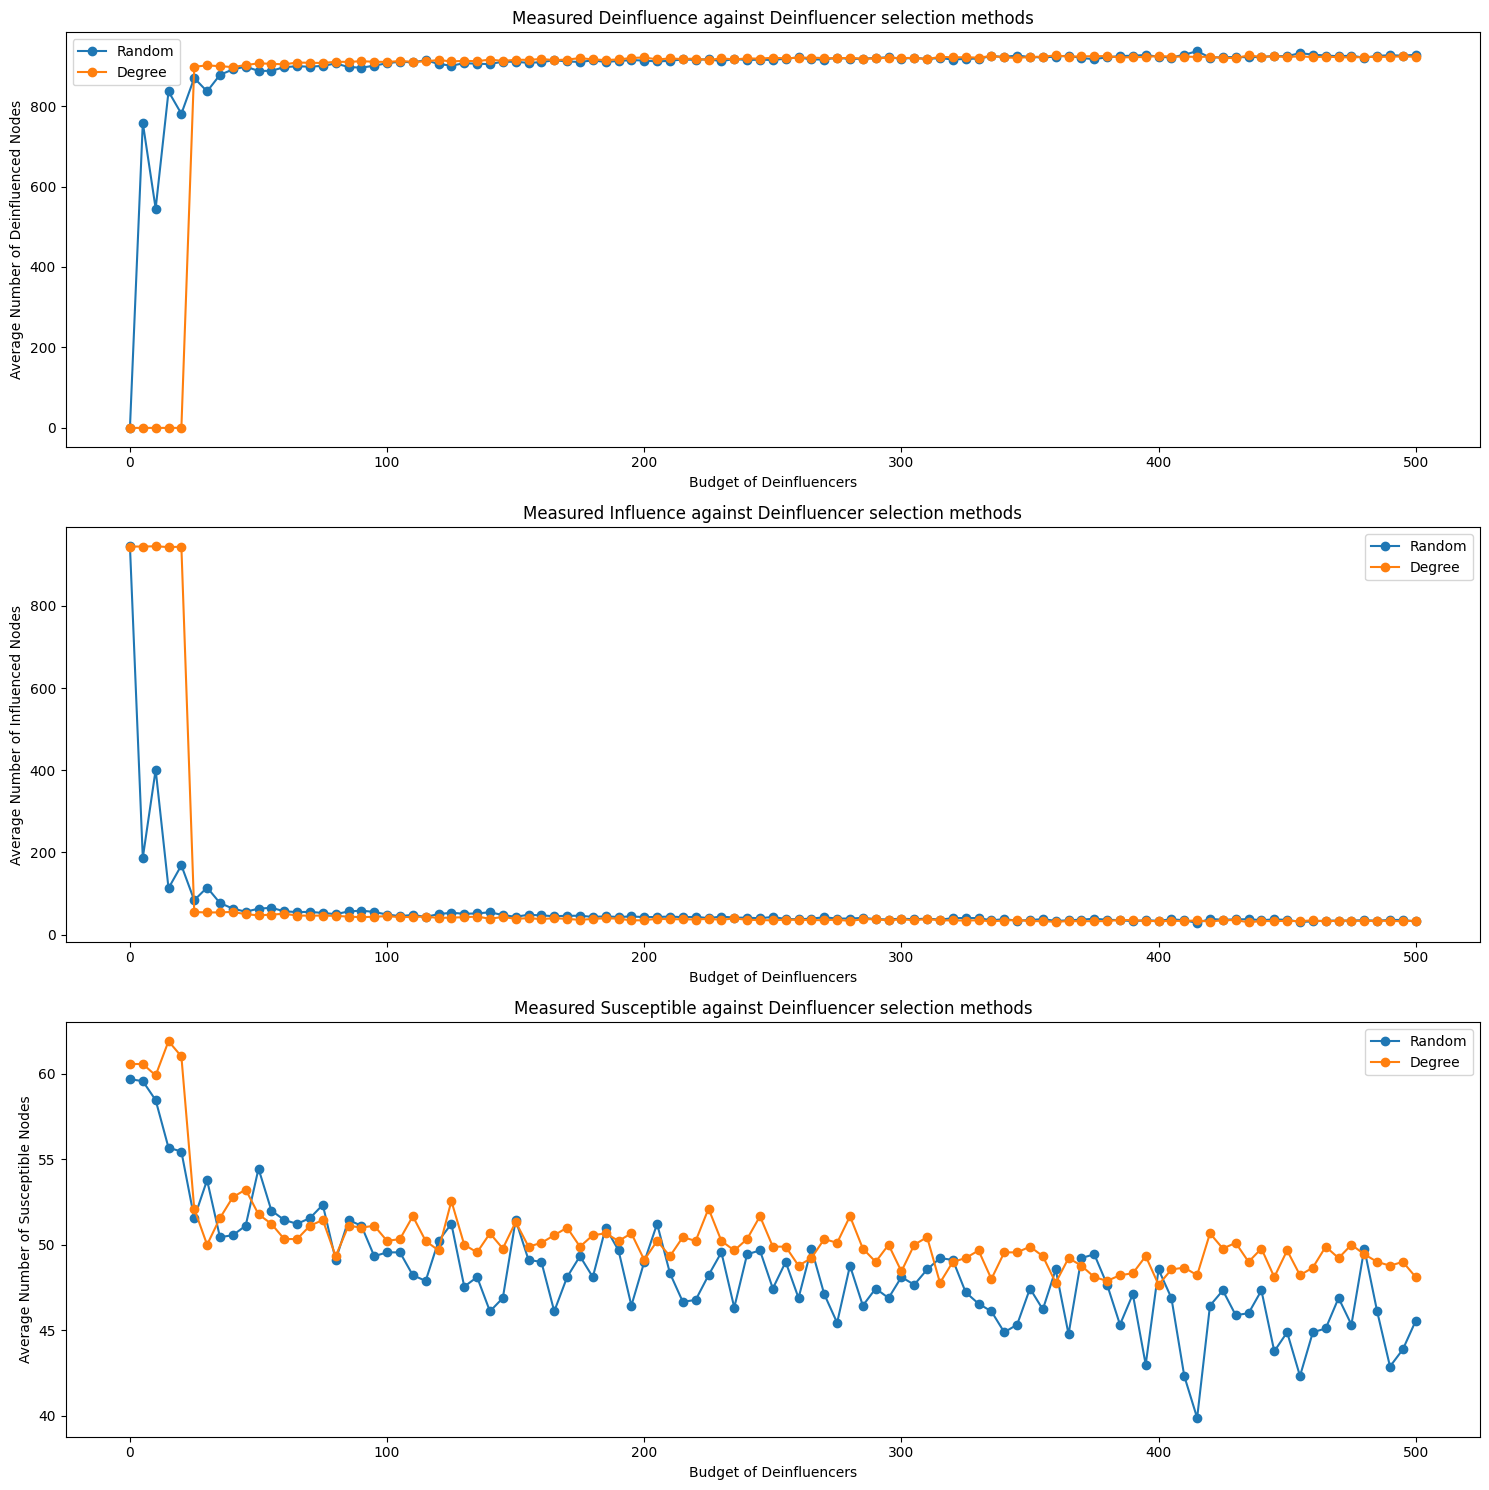

In [5]:

# Plotting results
fig, axs = plt.subplots(3, figsize=(15, 15))
axs[0].set_title('Measured Deinfluence against Deinfluencer selection methods')
axs[1].set_title('Measured Influence against Deinfluencer selection methods')
axs[2].set_title('Measured Susceptible against Deinfluencer selection methods')

# Create line plots
methods = results[next(iter(results))].keys()  # Get all methods from the first key
k_values = sorted(results.keys())  # Sort k values for plotting
total_nodes = len(G.nodes)

for method in methods:
    deinfluenced_nodes = [results[k][method][0] for k in k_values]
    influenced_nodes = [results[k][method][1] for k in k_values]
    susceptible_nodes = [total_nodes - (influenced + deinfluenced) for influenced, deinfluenced in zip(influenced_nodes, deinfluenced_nodes)]

    axs[0].plot(k_values, deinfluenced_nodes, label=method, marker="o")
    axs[1].plot(k_values, influenced_nodes, label=method, marker="o")
    axs[2].plot(k_values, susceptible_nodes, label=method, marker="o")

axs[0].legend()
axs[0].set_xlabel('Budget of Deinfluencers')
axs[0].set_ylabel('Average Number of Deinfluenced Nodes')

axs[1].legend()
axs[1].set_xlabel('Budget of Deinfluencers')
axs[1].set_ylabel('Average Number of Influenced Nodes')

axs[2].legend()
axs[2].set_xlabel('Budget of Deinfluencers')
axs[2].set_ylabel('Average Number of Susceptible Nodes')

plt.tight_layout()
plt.show()

In [6]:
# Run simulation for different values of k
budget_list = list(range(0, 501, 5))
deinfluencers_list = ef.select_deinfluencers_budget(budget_list, model_fixed_influencers,'budget_sqrt')
results = ef.average_results_simple(deinfluencers_list, model_fixed_influencers, num_runs=3, steps=3)

print(deinfluencers_list)

[(0, {'Random': set(), 'Degree': set()}), (5, {'Random': {768}, 'Degree': set()}), (10, {'Random': {261}, 'Degree': set()}), (15, {'Random': {561, 387, 815}, 'Degree': set()}), (20, {'Random': {776, 979}, 'Degree': set()}), (25, {'Random': {74, 514}, 'Degree': {160}}), (30, {'Random': {199, 807, 625, 602, 573, 319}, 'Degree': {160}}), (35, {'Random': {961, 325, 358, 905, 940, 780, 947, 887, 792, 989}, 'Degree': {160}}), (40, {'Random': {706, 836, 967, 749, 562, 210, 791, 156}, 'Degree': {160}}), (45, {'Random': {195, 678, 521, 273, 153, 794, 188, 703}, 'Degree': {160, 121}}), (50, {'Random': {673, 44, 530, 403, 947, 532, 787, 251}, 'Degree': {160, 121}}), (55, {'Random': {584, 305, 29, 178, 508, 93, 287}, 'Degree': {160, 121}}), (60, {'Random': {706, 4, 966, 811, 848, 498, 691, 372, 983, 120, 765, 862, 319}, 'Degree': {160, 121}}), (65, {'Random': {34, 484, 870, 710, 136, 426, 17, 853, 504}, 'Degree': {160, 121, 107}}), (70, {'Random': {290, 2, 201, 747, 528, 916, 246, 254}, 'Degree': 

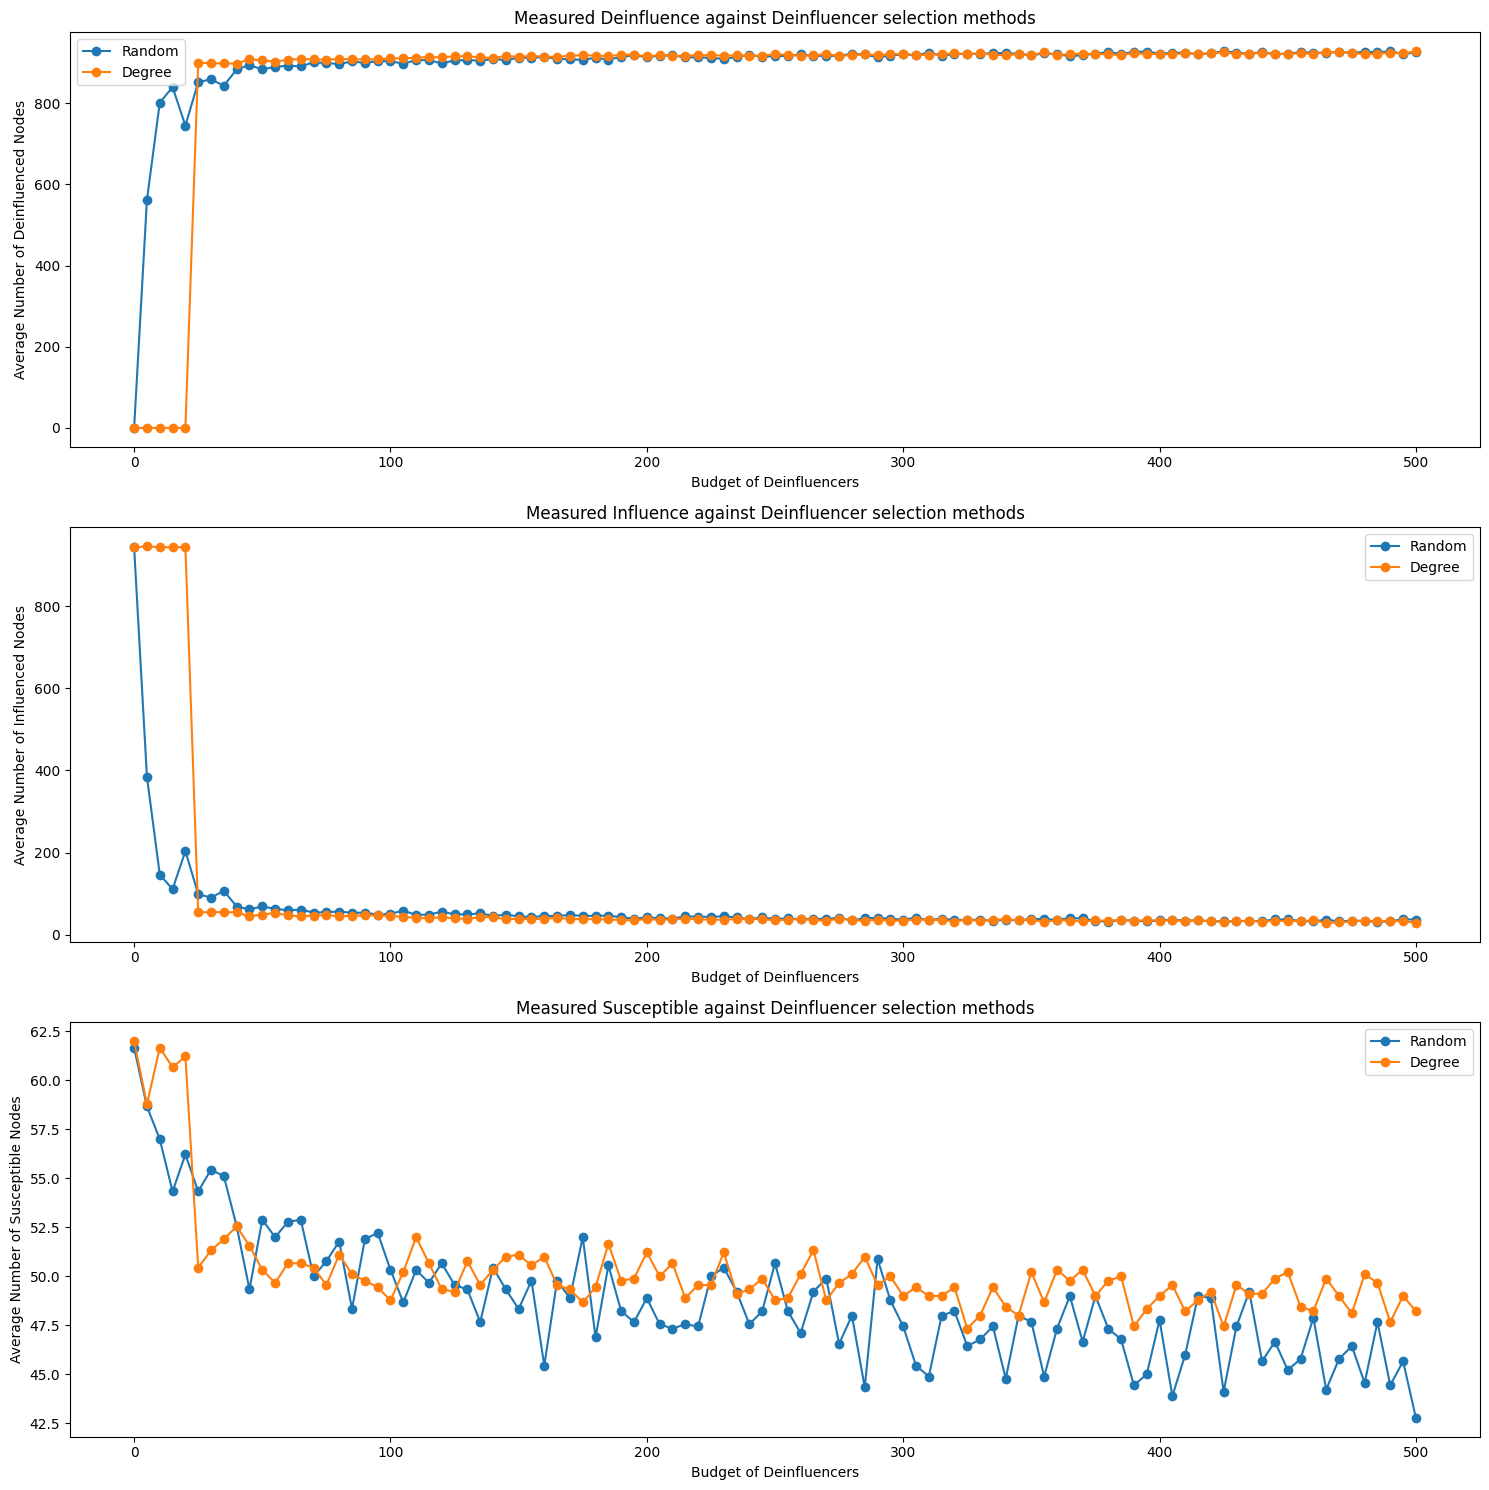

In [7]:

# Plotting results
fig, axs = plt.subplots(3, figsize=(15, 15))
axs[0].set_title('Measured Deinfluence against Deinfluencer selection methods')
axs[1].set_title('Measured Influence against Deinfluencer selection methods')
axs[2].set_title('Measured Susceptible against Deinfluencer selection methods')

# Create line plots
methods = results[next(iter(results))].keys()  # Get all methods from the first key
k_values = sorted(results.keys())  # Sort k values for plotting
total_nodes = len(G.nodes)

for method in methods:
    deinfluenced_nodes = [results[k][method][0] for k in k_values]
    influenced_nodes = [results[k][method][1] for k in k_values]
    susceptible_nodes = [total_nodes - (influenced + deinfluenced) for influenced, deinfluenced in zip(influenced_nodes, deinfluenced_nodes)]

    axs[0].plot(k_values, deinfluenced_nodes, label=method, marker="o")
    axs[1].plot(k_values, influenced_nodes, label=method, marker="o")
    axs[2].plot(k_values, susceptible_nodes, label=method, marker="o")

axs[0].legend()
axs[0].set_xlabel('Budget of Deinfluencers')
axs[0].set_ylabel('Average Number of Deinfluenced Nodes')

axs[1].legend()
axs[1].set_xlabel('Budget of Deinfluencers')
axs[1].set_ylabel('Average Number of Influenced Nodes')

axs[2].legend()
axs[2].set_xlabel('Budget of Deinfluencers')
axs[2].set_ylabel('Average Number of Susceptible Nodes')

plt.tight_layout()
plt.show()